In [ ]:
import pandas as pd
import numpy as np
import os
from exploratory_data_analysis import perform_correlation_analysis
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_context("talk")
sns.set_context("notebook", font_scale=1.2)
# sns.color_palette()



In [17]:
import scipy

In [2]:
from importlib import reload

In [19]:
import visualizer
reload(visualizer)
from visualizer import plot_dataframe_all_columns


In [46]:
import data_loader
reload(data_loader)
import config
reload(config)
from data_loader import load_data, remove_constant_columns, filter_outliers, denoise_dataframe, \
create_lag_features, load_and_preprocess_data, create_dataset_for_lstm
from config import LAG_FEATURES, LAG_STEPS

In [38]:
scaled_data, scaler, input_feature_indices, target_indices, existing_features, existing_targets = load_and_preprocess_data()

使用球磨机1的输入变量
对应的目标变量:
['磨浮工段1号球磨机旋流器溢流+80目', '磨浮工段1号球磨机旋流器溢流-200目']
--- 因低方差被移除的列 (15)---
  1. 磨浮工段1号球磨机7#旋流器运行
  2. 磨浮工段1号球磨机磨机主电机运行
  3. 磨浮工段1号球磨机2#高压油泵运行
  4. 磨浮工段1号球磨机1#旋流器运行
  5. 磨浮工段1号球磨机3#旋流器运行
  6. 磨浮工段1号球磨机2#旋流器运行
  7. 磨浮工段1号球磨机水量（检化）
  8. 磨浮工段1号球磨机4#旋流器运行
  9. 磨浮工段1号球磨机5#旋流器运行
  10. 磨浮工段1号球磨机砂泵运行
  11. 磨浮工段1号球磨机砂泵排污阀运行
  12. 磨浮工段1号球磨机给矿皮带运行
  13. 磨浮工段1号球磨机矿石比重
  14. 磨浮工段1号球磨机旋流器上浆（给矿矿浆）浓度
  15. 磨浮工段1号球磨机6#旋流器运行
-----------------------


In [49]:
X, y = create_dataset_for_lstm(scaled_data, input_feature_indices, target_indices)

In [50]:
X.shape, y.shape

((64740, 60, 29), (64740, 2))

In [48]:
data_q1, input_features, target_features = load_data()

使用球磨机1的输入变量
对应的目标变量:
['磨浮工段1号球磨机旋流器溢流+80目', '磨浮工段1号球磨机旋流器溢流-200目']


## filtering outliers

In [7]:
## global IQR outlier filtering with imputation
df_filtered, masks = filter_outliers(data_q1, method='iqr', rolling_window=25, iqr_multiplier=1.5, impute=True)
# plot_dataframe_all_columns(df_filtered, output_name='data_filtered', plot=True)
# plot_dataframe_all_columns_filtered(data_q1, filtered_df=df_filtered, outlier_masks=masks, output_name='data_filtered_comparison', plot=True)

In [8]:
## rolling window IQR outlier filtering with imputation
df_rolling_filtered, masks = filter_outliers(data_q1, method='rolling_iqr', rolling_window=25, iqr_multiplier=1.5, impute=True)
# plot_dataframe_all_columns(df_rolling_filtered, output_name='data_rolling_filtered', plot=True)

In [33]:
# specific_columns = ['磨浮工段1号球磨累计电机耗电量', '磨浮工段1号球磨机砂泵转速', '磨浮工段1号球磨机1#旋流器运行']

# test_filtered, masks = filter_outliers(data_q1[specific_columns], method='rolling_iqr', combine_with_global=True, rolling_window=240, iqr_multiplier=1.5, impute=True)
# plt.figure(figsize=(15, 6))
# plt.plot(test_filtered['磨浮工段1号球磨累计电机耗电量'])
# plt.plot(test_filtered['磨浮工段1号球磨机砂泵转速'])
# plt.plot(test_filtered['磨浮工段1号球磨机1#旋流器运行'])


In [10]:
## rolling window IQR combined with global IQR outlier filtering
df_rolling_combined, masks = filter_outliers(data_q1, method='rolling_iqr', combine_with_global=True, rolling_window=240, iqr_multiplier=1.5, impute=True)
# plot_dataframe_all_columns(df_rolling_combined, output_name='data_rolling_combined', plot=True)


In [11]:
data_removed = remove_constant_columns(df_rolling_combined)

--- 因低方差被移除的列 (40): ['磨浮工段3号球磨机6#旋流器运行', '磨浮工段2号球磨机砂泵排污阀运行', '磨浮工段1号球磨机7#旋流器运行', '磨浮工段3号球磨机磨机主电机运行', '磨浮工段2号球磨机3#旋流器运行', '磨浮工段3号球磨机给矿皮带运行', '磨浮工段1号球磨机6#旋流器运行', '磨浮工段2号球磨机磨机主电机运行', '磨浮工段1号球磨机2#高压油泵运行', '磨浮工段1号球磨机砂泵运行', '磨浮工段2号球磨机5#旋流器运行', '磨浮工段3号球磨机3#旋流器运行', '磨浮工段1号球磨机给矿皮带运行', '磨浮工段1号球磨机磨机主电机运行', '磨浮工段1号球磨机3#旋流器运行', '磨浮工段1号球磨机旋流器上浆（给矿矿浆）浓度', '磨浮工段3号球磨机7#旋流器运行', '磨浮工段1号球磨机砂泵排污阀运行', '磨浮工段1号球磨机矿石比重', '磨浮工段2号球磨机矿石比重', '磨浮工段2号球磨机4#旋流器运行', '磨浮工段1号球磨机水量（检化）', '磨浮工段1号球磨机2#旋流器运行', '磨浮工段3号球磨机5#旋流器运行', '磨浮工段2号球磨机1#旋流器运行', '磨浮工段2号球磨机6#旋流器运行', '磨浮工段2号球磨机砂泵运行', '磨浮工段3号球磨机旋流器上浆（给矿矿浆）浓度', '磨浮工段3号球磨机砂泵运行', '磨浮工段2号球磨机给矿皮带运行', '磨浮工段1号球磨机5#旋流器运行', '磨浮工段3号球磨机砂泵排污阀运行', '磨浮工段3号球磨机矿石比重', '磨浮工段1号球磨机1#旋流器运行', '磨浮工段2号球磨机7#旋流器运行', '磨浮工段3号球磨机4#旋流器运行', '磨浮工段2号球磨机2#旋流器运行', '磨浮工段3号球磨机2#旋流器运行', '磨浮工段1号球磨机4#旋流器运行', '磨浮工段3号球磨机1#旋流器运行'] ---


In [12]:
data_removed.columns.size

91

## noise removal

In [13]:
denoised = denoise_dataframe(data_removed, method='rolling_median', window=240)


d:\yaojian\grinding\pytorch_lstm_analyse\data_loader.py:413: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  smoothed = smoothed.fillna(method='ffill').fillna(method='bfill')


In [13]:
# plot_dataframe_all_columns(denoised, output_name='denoised', plot=True)


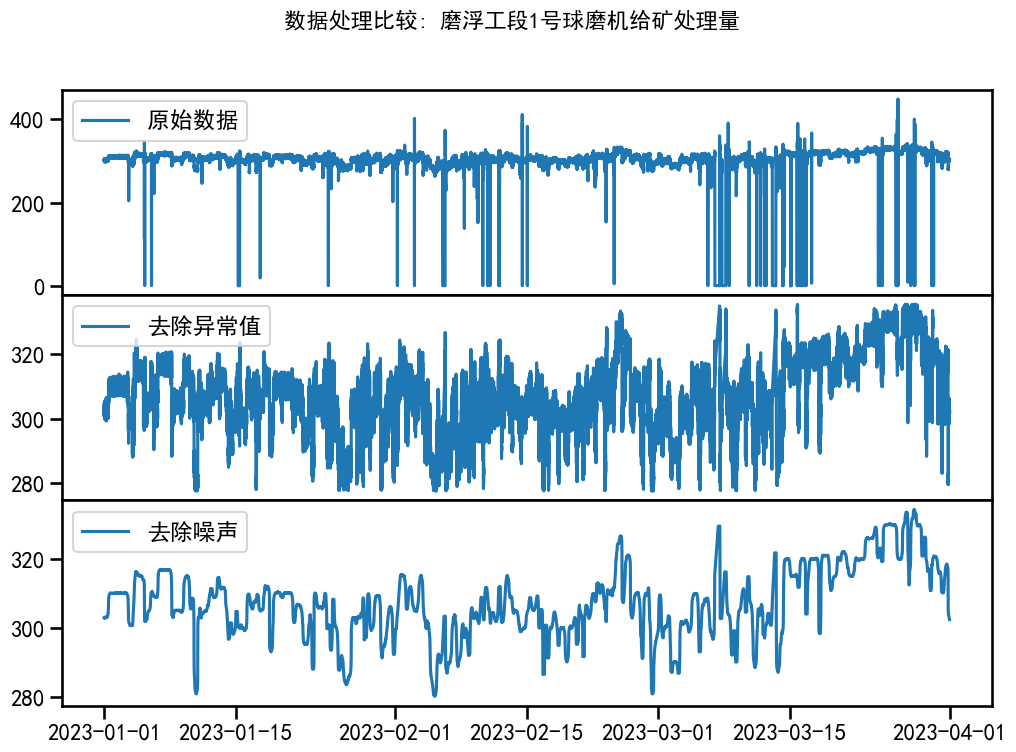

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
fig.subplots_adjust(hspace=0)
# key = '磨浮工段1号球磨机磨矿浓度'
key =  '磨浮工段1号球磨机给矿处理量'
fig.suptitle(f'数据处理比较: {key}', fontsize=16)
axes[0].plot(data_q1[key], label='原始数据')
axes[1].plot(df_rolling_combined[key], label='去除异常值')
axes[2].plot(denoised[key], label='去除噪声')

axes[0].legend()
axes[1].legend()
axes[2].legend()

In [31]:
denoised.columns.size

91

### 相关性分析

In [24]:
import exploratory_data_analysis
reload(exploratory_data_analysis)
from exploratory_data_analysis import perform_correlation_analysis, perform_mutual_information_analysis

In [176]:
ALL_INPUT_FEATURES = [
    '磨浮工段1号球磨机砂泵功率', '磨浮工段1号球磨机砂泵转速', '磨浮工段1号球磨机泵池液位', 
    '磨浮工段1号球磨机返砂含水量', '磨浮工段1号球磨机给矿处理量', '磨浮工段1号球磨机给矿含水量', '磨浮工段1号球磨机磨机功率', 
    '磨浮工段1号球磨机磨矿浓度', '磨浮工段1号球磨机前给水', 
    '磨浮工段1号球磨机上浆总流量',  '磨浮工段1号球磨机旋流器返砂矿量',
    '磨浮工段1号球磨机旋流器返砂浓度', '磨浮工段1号球磨机旋流器工作压力', '磨浮工段1号球磨机旋流器上浆（给矿矿浆）浓度',
    '磨浮工段1号球磨机旋流器上浆流量', '磨浮工段1号球磨机溢流固体量',
]

#### correlation analysis


=== 相关性分析 ===

--- Pearson 相关性分析 ---
相关对 (|r| >= 0.5): 共 23 对
磨浮工段1号球磨机砂泵功率 <-> 磨浮工段1号球磨机上浆固体量: P = 0.756
磨浮工段1号球磨机砂泵功率 <-> 磨浮工段1号球磨机上浆含水量: P = 0.756
磨浮工段1号球磨机砂泵功率 <-> 磨浮工段1号球磨机上浆总流量: P = 0.756
磨浮工段1号球磨机砂泵功率 <-> 磨浮工段1号球磨机旋流器上浆流量: P = 0.757
磨浮工段1号球磨机砂泵转速 <-> 磨浮工段1号球磨机磨机功率: P = -0.501
磨浮工段1号球磨机返砂含水量 <-> 磨浮工段1号球磨机磨矿浓度: P = 0.763
磨浮工段1号球磨机返砂含水量 <-> 磨浮工段1号球磨机旋流器返砂矿量: P = 0.662
磨浮工段1号球磨机返砂含水量 <-> 磨浮工段1号球磨机旋流器返砂浓度: P = 0.733
磨浮工段1号球磨机返砂含水量 <-> 磨浮工段1号球磨机溢流固体量: P = -0.602
磨浮工段1号球磨机给矿处理量 <-> 磨浮工段1号球磨机给矿含水量: P = 0.999
磨浮工段1号球磨机磨矿浓度 <-> 磨浮工段1号球磨机旋流器返砂矿量: P = 0.744
磨浮工段1号球磨机磨矿浓度 <-> 磨浮工段1号球磨机旋流器返砂浓度: P = 0.842
磨浮工段1号球磨机磨矿浓度 <-> 磨浮工段1号球磨机溢流固体量: P = -0.890
磨浮工段1号球磨机上浆固体量 <-> 磨浮工段1号球磨机上浆含水量: P = 1.000
磨浮工段1号球磨机上浆固体量 <-> 磨浮工段1号球磨机上浆总流量: P = 1.000
磨浮工段1号球磨机上浆固体量 <-> 磨浮工段1号球磨机旋流器上浆流量: P = 1.000
磨浮工段1号球磨机上浆含水量 <-> 磨浮工段1号球磨机上浆总流量: P = 1.000
磨浮工段1号球磨机上浆含水量 <-> 磨浮工段1号球磨机旋流器上浆流量: P = 1.000
磨浮工段1号球磨机上浆总流量 <-> 磨浮工段1号球磨机旋流器上浆流量: P = 1.000
磨浮工段1号球磨机旋流器返砂矿量 <-> 磨浮工段1号球磨机旋流器返砂浓度: P = 0.862
磨浮工段1号球磨机旋流器返砂矿量 <-> 磨浮工

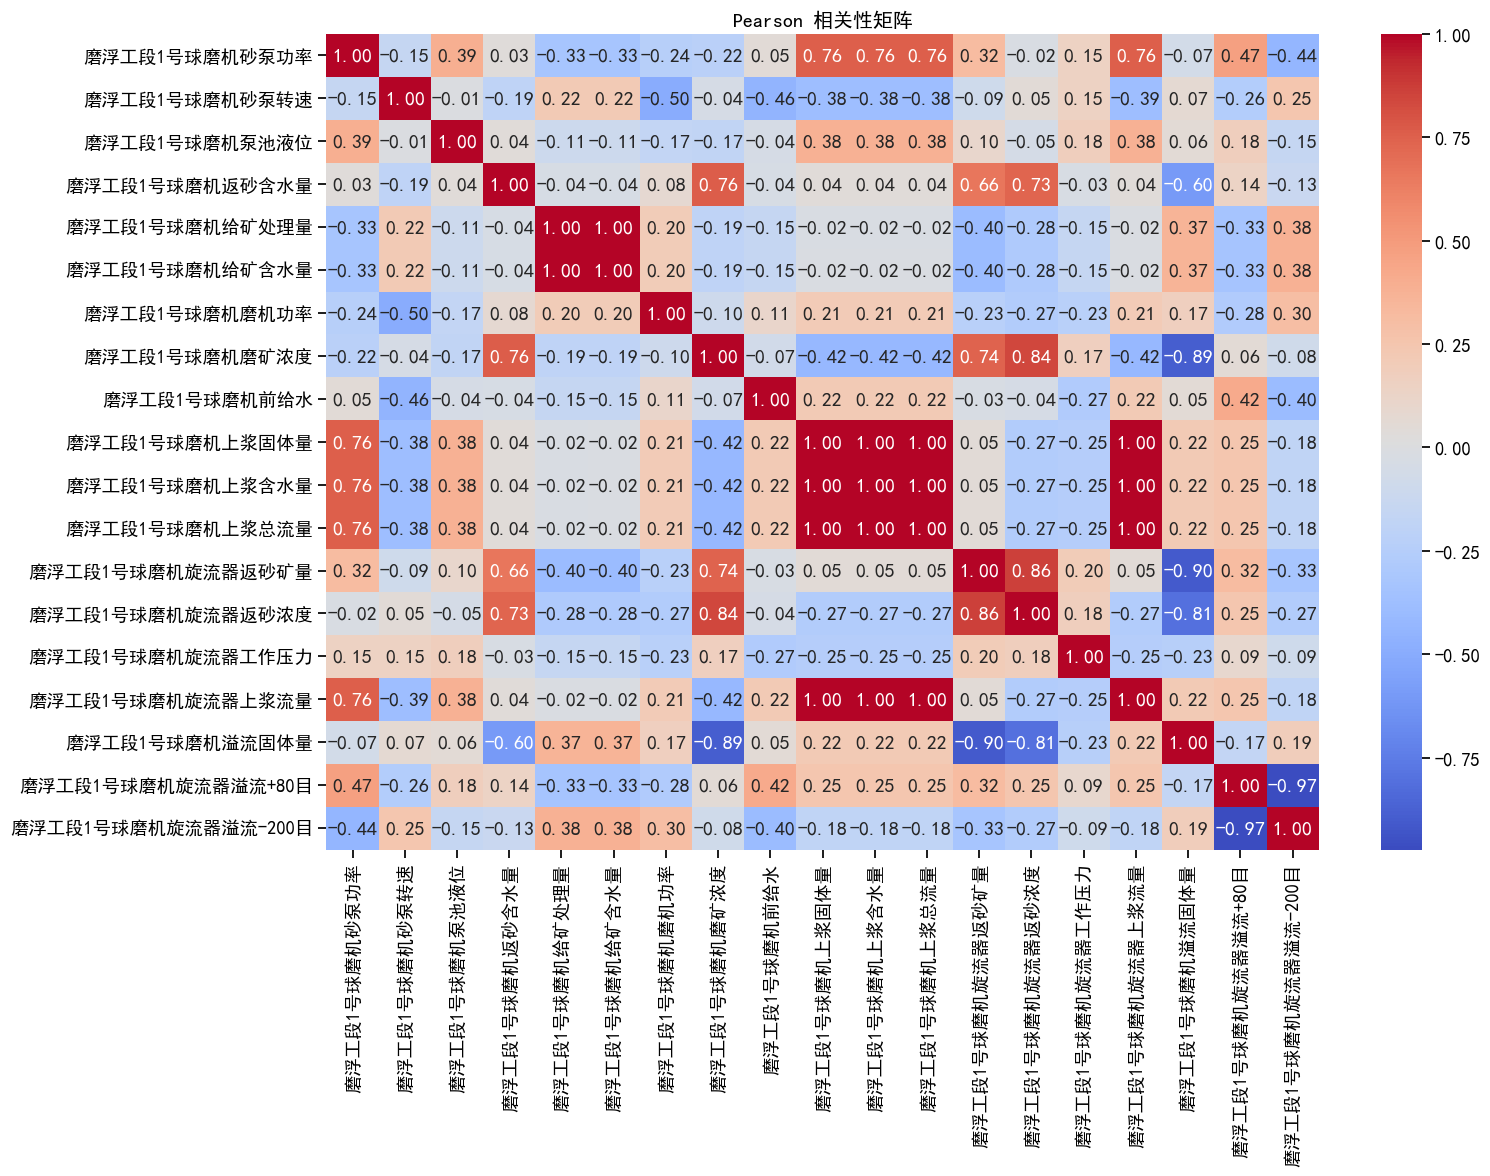

In [ ]:
corref = perform_correlation_analysis(denoised, input_features, target_features, method='pearson')

In [18]:
corref.to_csv('corref.csv', index=True)


#### cross correlation analysis


--- 时滞互相关分析 ---


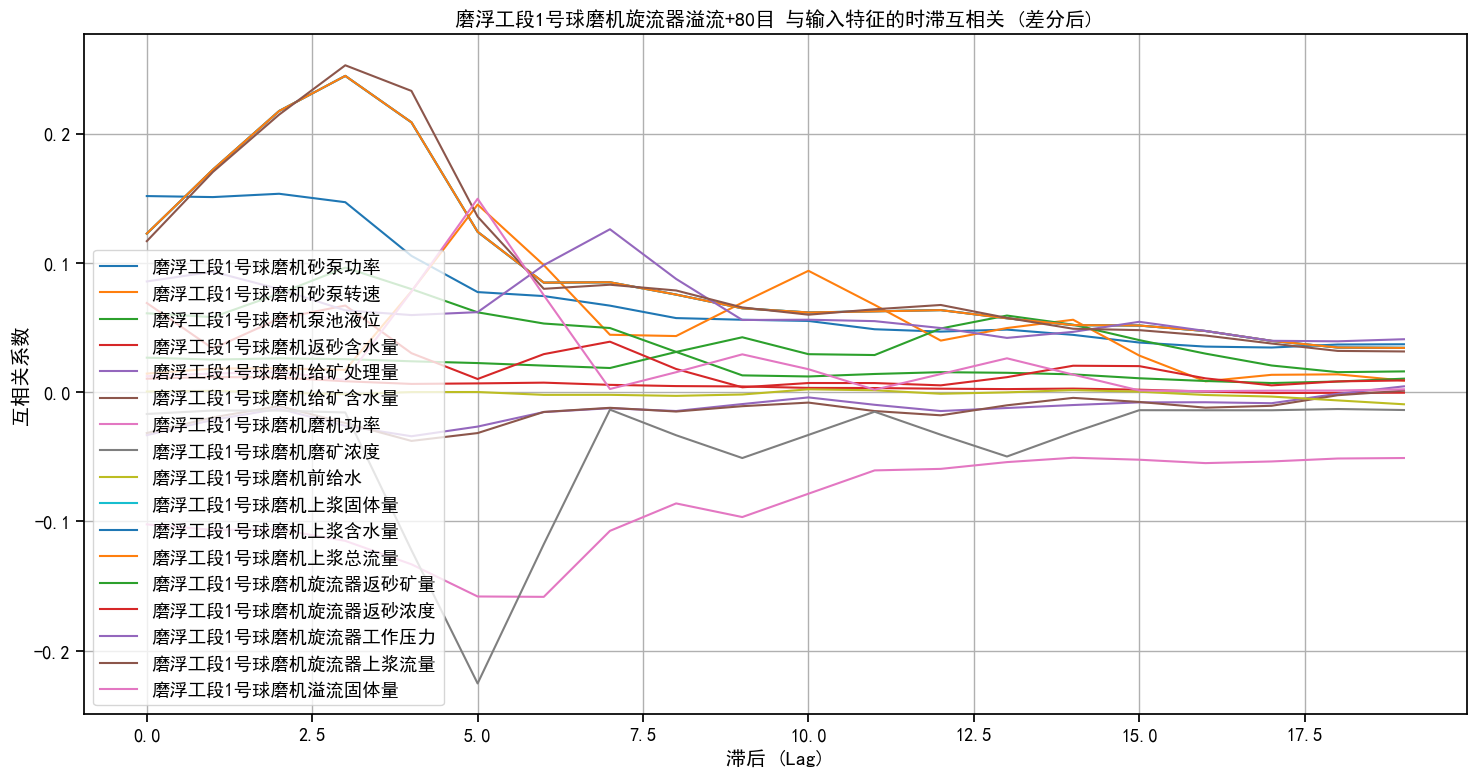

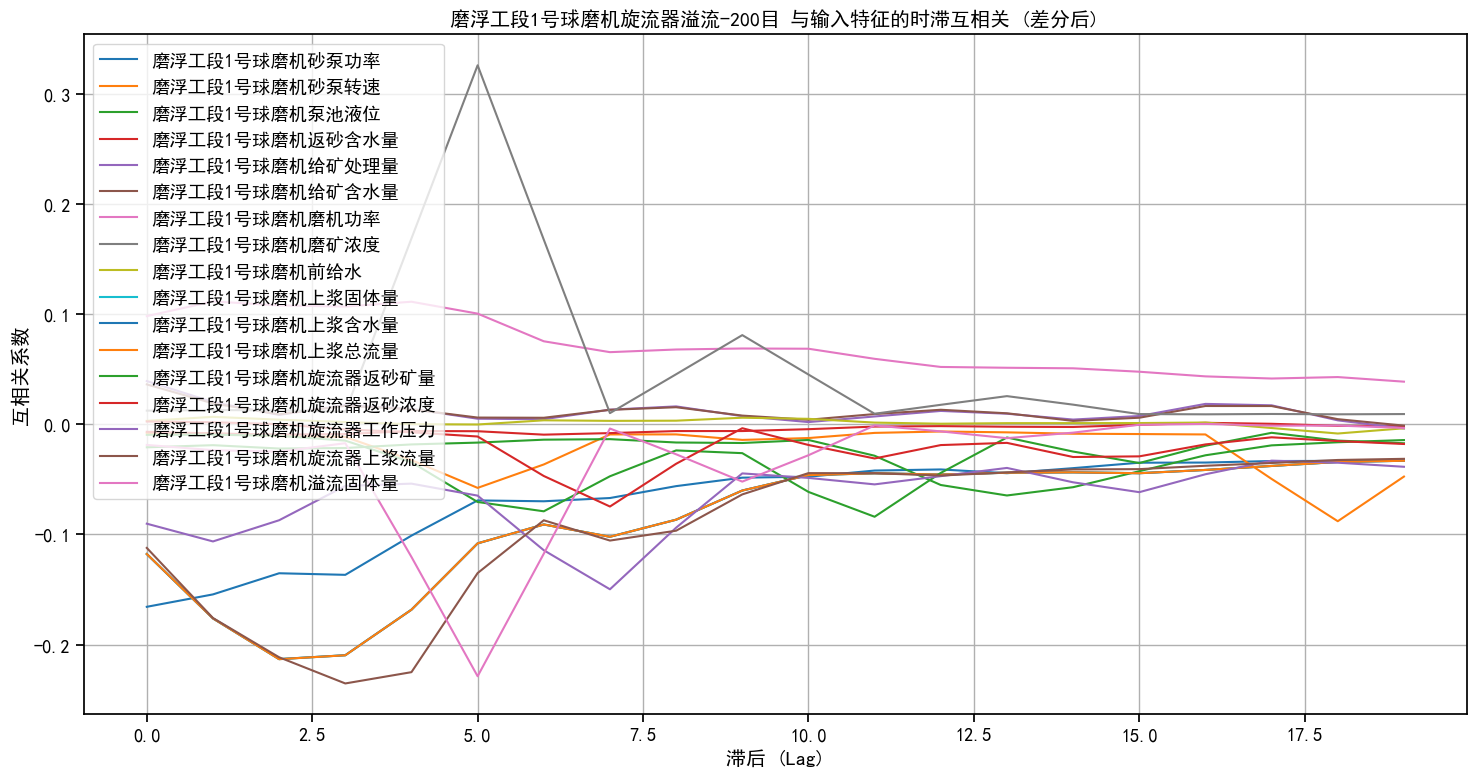

In [ ]:
from exploratory_data_analysis import perform_cross_correlation_analysis


cross_corre = perform_cross_correlation_analysis(denoised, input_features, target_features, max_lag=20)

#### mutal information

In [ ]:
mi_results = perform_mutual_information_analysis(denoised, input_features, target_features)


--- 互信息分析 ---
互信息分数 (输入特征 vs 目标变量):

                  磨浮工段1号球磨机旋流器溢流+80目  磨浮工段1号球磨机旋流器溢流-200目
磨浮工段1号球磨机溢流固体量              3.384628             3.396957
磨浮工段1号球磨机磨矿浓度               3.283375             3.274540
磨浮工段1号球磨机返砂含水量              3.276023             3.295785
磨浮工段1号球磨机旋流器返砂浓度            3.259137             3.252746
磨浮工段1号球磨机旋流器返砂矿量            3.215251             3.230634
磨浮工段1号球磨机前给水                3.024325             3.014439
磨浮工段1号球磨机旋流器工作压力            3.007852             3.018773
磨浮工段1号球磨机给矿含水量              2.908806             2.904891
磨浮工段1号球磨机给矿处理量              2.893017             2.887117
磨浮工段1号球磨机旋流器上浆流量            2.872799             2.853546
磨浮工段1号球磨机上浆固体量              2.867203             2.856600
磨浮工段1号球磨机上浆含水量              2.866251             2.853610
磨浮工段1号球磨机上浆总流量              2.858924             2.847391
磨浮工段1号球磨机砂泵功率               2.765626             2.738961
磨浮工段1号球磨机磨机功率               2.747932             2.753471
磨浮工段1号球磨机砂泵转速               2.4784

### PCA降维之后的相关性分析